Loading database at ../../datasets/rc_car/Stanmer_park_dataset/2611/unwrapped_dataset1...
Loading database at ../../datasets/rc_car/Stanmer_park_dataset/2611/unwrapped_dataset2...
Loading database at ../../datasets/rc_car/Stanmer_park_dataset/2611/unwrapped_dataset3...


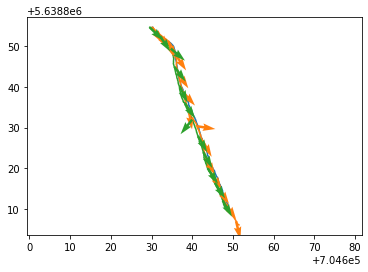

In [10]:
import sys
NAVBENCH_ROOT = '../..'
sys.path.append(NAVBENCH_ROOT)

import matplotlib.pyplot as plt
import navbench as nb
from navbench import improc as ip
import numpy as np


DB_ROOT = os.path.join(NAVBENCH_ROOT, 'datasets/rc_car/Stanmer_park_dataset/2611')
dbs = [nb.Database('%s/unwrapped_dataset%d' % (DB_ROOT, i)) for i in range(1, 4)]

_, ax = plt.subplots()
lines = []
for db in dbs:
    lines.append(ax.plot(db.x, db.y))
ax.axis('equal')

IM_SIZE = (90, 25)
PREPROC = ip.resize(*IM_SIZE)
SNAP_STEP = 25

heading_offset = dbs[0].calculate_heading_offset(0.25)
image_sets = [db.read_images(preprocess=PREPROC) for db in dbs]

snapshots = image_sets[0][::SNAP_STEP]

colours = [line[0].get_color() for line in lines]
for db, test_images, colour in zip(dbs[1:], image_sets[1:], colours[1:]):
    test_images = test_images[::SNAP_STEP]

    headings = heading_offset + nb.get_ridf_headings(test_images, snapshots)
    u = np.cos(headings)
    v = np.sin(headings)
    ax.quiver(db.x[::SNAP_STEP], db.y[::SNAP_STEP], u, v, color=colour, zorder=10);